In [446]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from astropy.io import fits
import sys
from helita.io import lp
from scipy.io.idl import readsav
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib import cm
import sunpy.cm as cmaps
from sklearn.impute import SimpleImputer
import h5py
from matplotlib.path import Path
from matplotlib.image import NonUniformImage
from tqdm import tqdm
import cmasher as cmr
from matplotlib.path import Path
import matplotlib.colors as colors

In [447]:
dpath_energy = '/mn/stornext/d9/souvikb/High_impact/'
dpath_simulation ='/mn/stornext/d5/juanms/mpi3druns/2Druns/genohm/rain/l2d90x40rvk/sim_data_rh_it=280-369.hdf5'

In [448]:
energy = h5py.File(dpath_energy+'spicule_energy_it=280-369.hdf5', 'r')
e = energy['e']
input_sim = h5py.File(dpath_simulation,'r')
temp_juan=input_sim['temperature']
vel_juan=input_sim['velocity_z']
z    = input_sim['z']#Height (m)
x    = input_sim['x']#Spatial [m]
y    = input_sim['y']# time []

In [486]:
#Reading the X (Mm), Z (Mm) and Y (sec) information from the simulation
z1 = z[0,:]/1e6
x_extent = x[4320:5759]/1e6
#extend = (x1.min(),x1.max(),z1.max(),z1.min())
x2 = y[:]*10 -y[0]*10
extend1 = (x2.min(),x2.max(),z1.max(),z1.min())
# x_pos1=4865-4176
# x_pos2=4980-4176
print(e.shape)

(6930, 90, 1554)


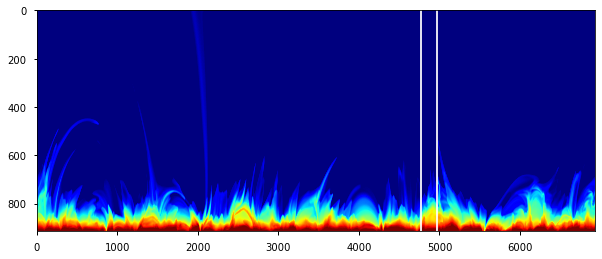

In [196]:
#Testing whether the energy read from the simulation using my python code works or not. 
plt.figure(figsize=(10,10))
plt.imshow(np.log10(e[:,44,500:1415]).T,cmap='jet',vmax=0,vmin=-5,aspect=3)
plt.axvline(x=4172+600,color='white')
plt.axvline(x=4172+800,color='white')
#plt.colorbar()

## Energy 

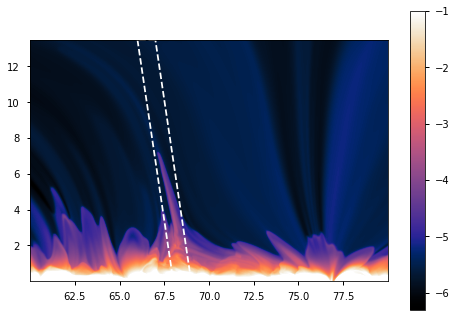

In [459]:
point1 = [68.0,0.006] #Checking the ROI
point2 = [69.0,0.006]
point3 = [67.0,13.49]
point4 = [66.0,13.49]
x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]

x_values2 =[point2[0],point3[0]]
y_values2 = [point2[1],point3[1]]

x_values3 =[point3[0],point4[0]]
y_values3 = [point3[1],point4[1]]

x_values4 = [point4[0],point1[0]]
y_values4 = [point4[1],point1[1]]
 
plt.imshow(np.log10(e[4320:5759,14,500:1410]).T,cmap=cmr.heat,vmax=-1,extent=[x_extent[0],x_extent[-1],z1[1410],z1[500]])
plt.plot(x_values1, y_values1,linestyle='--',color='white')
plt.plot(x_values2, y_values2,linestyle='--',color='white')
plt.plot(x_values3, y_values3,linestyle='--',color='white')
plt.plot(x_values4, y_values4,linestyle='--',color='white')
plt.colorbar()

# Temperature

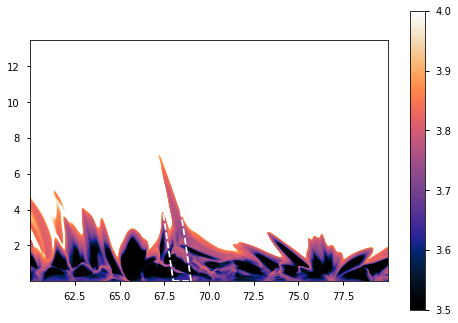

In [463]:
point1 = [68.0,0.006]# same ROI
point2 = [69.0,0.006]
point3 = [67.0,13.49]
point4 = [66.0,13.49]
x_values1 = [point1[0], point2[0]]
y_values1 = [point1[1], point2[1]]

x_values2 =[point2[0],point3[0]]
y_values2 = [point2[1],point3[1]]

x_values3 =[point3[0],point4[0]]
y_values3 = [point3[1],point4[1]]

x_values4 = [point4[0],point1[0]]
y_values4 = [point4[1],point1[1]]
plt.imshow(np.log10(temp_juan[0,4320:5759,14,500:1410]).T,cmap=cmr.heat,vmax=4, vmin=3.5,extent=[x_extent[0],x_extent[-1],z1[1410],z1[500]])
plt.plot(x_values1, y_values1,linestyle='--',color='white')
plt.plot(x_values2, y_values2,linestyle='--',color='white')
plt.plot(x_values3, y_values3,linestyle='--',color='white')
plt.plot(x_values4, y_values4,linestyle='--',color='white')
plt.colorbar()

## X-T Energy map along the slit


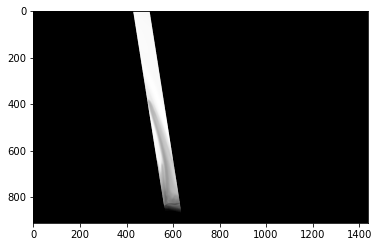

In [108]:
nx, ny = 910, 1439
#poly_verts =[(429,909), (501,909), (645,0), (573,0)]
poly_verts =[(910,645), (910,573), (0,429), (0,501)]
x, y = np.meshgrid(np.arange(nx), np.arange(ny))
x, y = x.flatten(), y.flatten()
points = np.vstack((x,y)).T
path = Path(poly_verts)
grid = path.contains_points(points)
grid = np.array(grid.reshape((ny,nx)))
mul = grid*np.log10(e[4320:5759,20,500:1410])
plt.imshow(mul.T,vmax=-1,cmap='gray_r')

In [221]:
x_slice =[4320,5759]
y_slice =[500,1410]
roi_spicule = np.zeros((x_slice[1]-x_slice[0],y_slice[1]-y_slice[0],90))
for time in tqdm(range(90)):
    nx, ny = 910, 1439
    poly_verts =[(910,645), (910,573), (0,429), (0,501)]
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    path = Path(poly_verts)
    grid = path.contains_points(points)
    grid = np.array(grid.reshape((ny,nx)))
    roi_spicule[:,:,time]=grid*e[4320:5759,time,500:1410]
    
    

100%|██████████| 90/90 [01:57<00:00,  1.31s/it]


## X-T temperature map along the slit

In [222]:
x_slice =[4320,5759]
y_slice =[500,1410]
roi_spicule_temp = np.zeros((x_slice[1]-x_slice[0],y_slice[1]-y_slice[0],90))
for time in tqdm(range(90)):
    nx, ny = 910, 1439
    poly_verts =[(910,645), (910,573), (0,429), (0,501)]
    x, y = np.meshgrid(np.arange(nx), np.arange(ny))
    x, y = x.flatten(), y.flatten()
    points = np.vstack((x,y)).T
    path = Path(poly_verts)
    grid = path.contains_points(points)
    grid = np.array(grid.reshape((ny,nx)))
    roi_spicule_temp[:,:,time]=grid*temp_juan[0,4320:5759,time,500:1410]

100%|██████████| 90/90 [00:42<00:00,  2.14it/s]


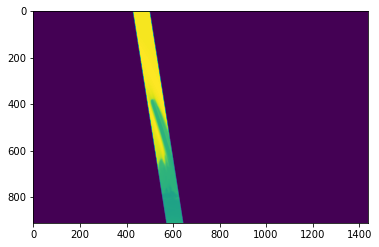

In [198]:
plt.imshow(np.swapaxes(roi_spicule_temp[:,:,27],0,1))

In [224]:
#Obtaining the mean along the slit. 
E_xt_slit = np.mean(roi_spicule,axis=0)
T_xt_slit = np.mean(roi_spicule_temp,axis=0)

<ipython-input-375-4857a540cc08>:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow((T_xt_slit[200:,:]),aspect=0.05,cmap=cmr.rainforest,vmax=1.6e4,norm=colors.PowerNorm(gamma=0.7))


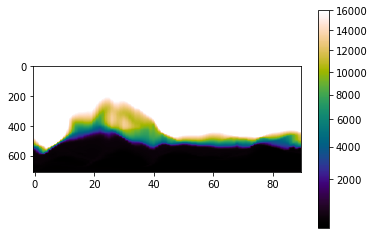

In [375]:
plt.imshow((T_xt_slit[200:,:]),aspect=0.05,cmap=cmr.rainforest,vmax=1.6e4,norm=colors.PowerNorm(gamma=0.7))
plt.colorbar()

<ipython-input-569-392ab60beb2f>:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(np.log10(E_xt_slit[200:,:]),aspect=0.05,cmap ='plasma',norm=colors.PowerNorm(gamma=0.7),vmin=-7,vmax=-0)


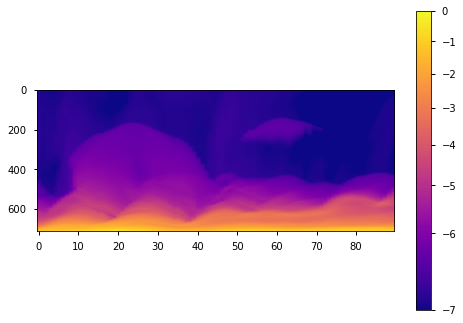

In [569]:
plt.imshow(np.log10(E_xt_slit[200:,:]),aspect=0.05,cmap ='plasma',norm=colors.PowerNorm(gamma=0.7),vmin=-7,vmax=-0)
plt.colorbar()

In [126]:
mask_contour=np.zeros((1386,1554))
temp_for_contour = temp_juan[0,4176:5562,10,:]
w_pixels = np.where(temp_for_contour<=20000)
mask_contour[w_pixels]=1.

In [63]:
np.mean(e[4176:5562,5:44,500:],axis=0).shape

(39, 1054)

In [15]:
#masked_energy = np.zeros((1386,904,90))
masked_temp = np.zeros((1386,904,90))
for snap in tqdm(range(len(y)),ascii=True, desc="Progress:"):
    mask_contour=np.zeros((1386,1554))
    temp_for_contour = temp_juan[0,4176:5562,snap,:]
    w_pixels = np.where(temp_for_contour<=50000)
    mask_contour[w_pixels]=1.
    masked_temp[:,:,snap] = temp_juan[0,4176:5562,snap,650:]*mask_contour[:,650:]
#    masked_energy[:,:,snap] = e[4176:5562,snap,650:]*mask_contour[:,650:]

Progress:: 100%|##########| 90/90 [01:14<00:00,  1.20it/s]


In [29]:
z[0,800]/1e6

7.294441

  0%|          | 0/50 [00:00<?, ?it/s]<ipython-input-595-f94a272262ee>:22: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im1=axs[1].imshow((T_xt_slit[:,:50]/1e3),aspect='auto',cmap=cmr.rainforest,vmax=16,norm=colors.PowerNorm(gamma=0.7),extent=[x2[0],x2[50],z1[1410],z1[500]])
<ipython-input-595-f94a272262ee>:45: RuntimeWarning: divide by zero encountered in log10
  im3=axs[3].imshow(np.log10(E_xt_slit[:,:50]),aspect='auto',cmap ='plasma',norm=colors.PowerNorm(gamma=0.7),vmin=-7,vmax=-2,extent=[x2[0],x2[50],z1[1410],z1[500]])
<ipython-input-595-f94a272262ee>:45: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  im3=axs[3].imshow(np.log10(E_xt_slit

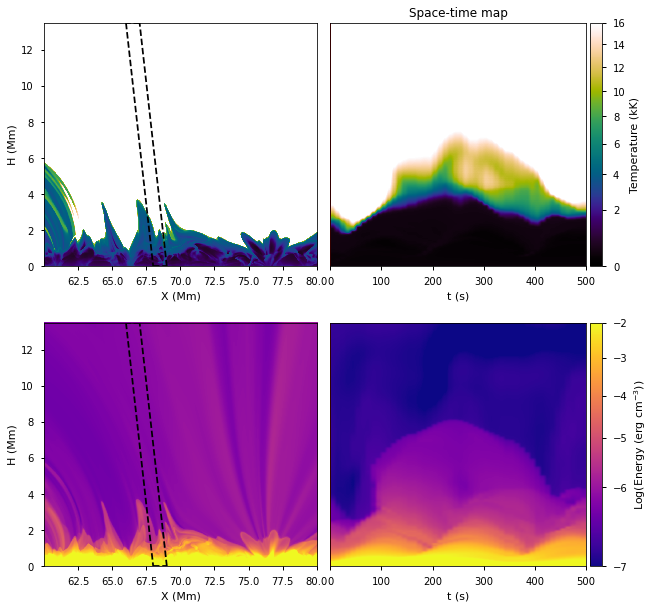

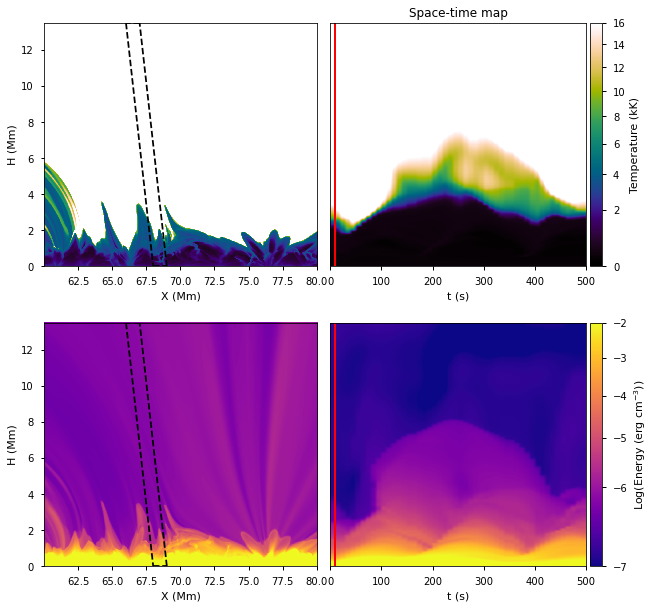

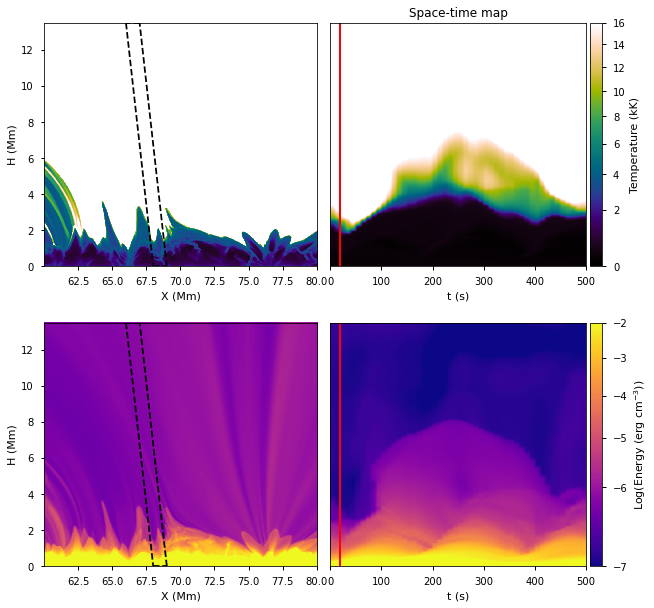

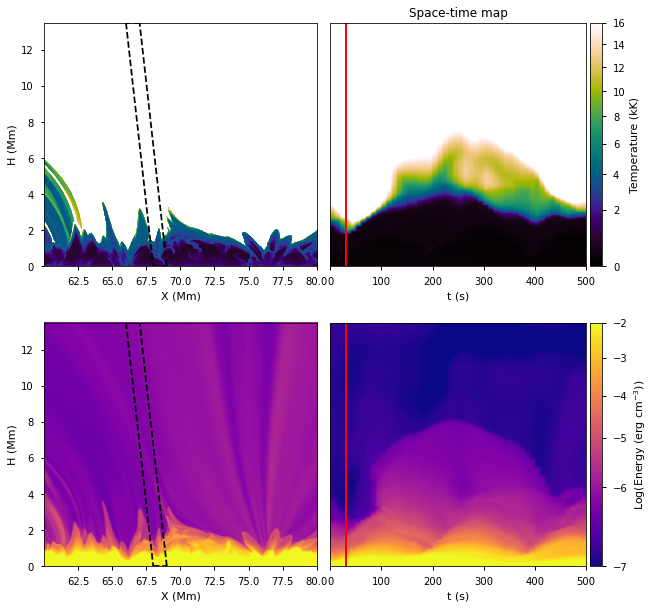

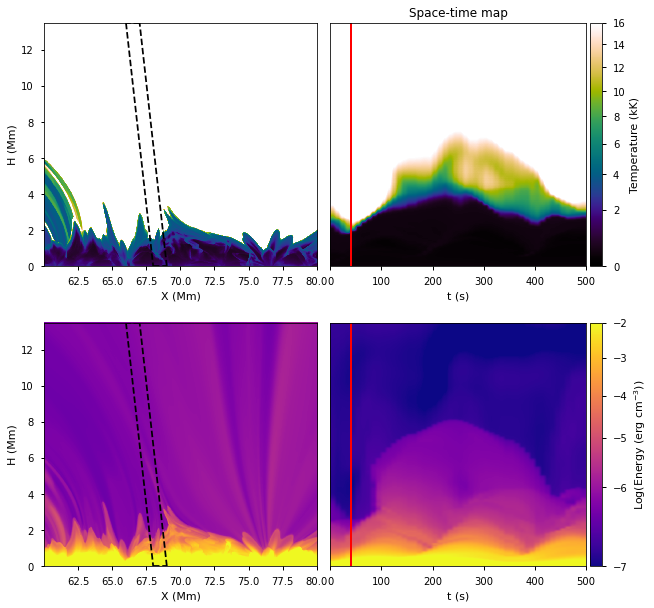

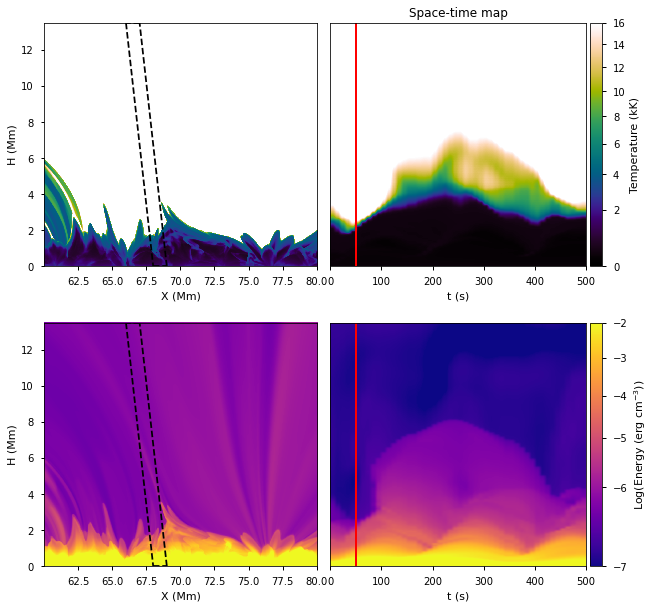

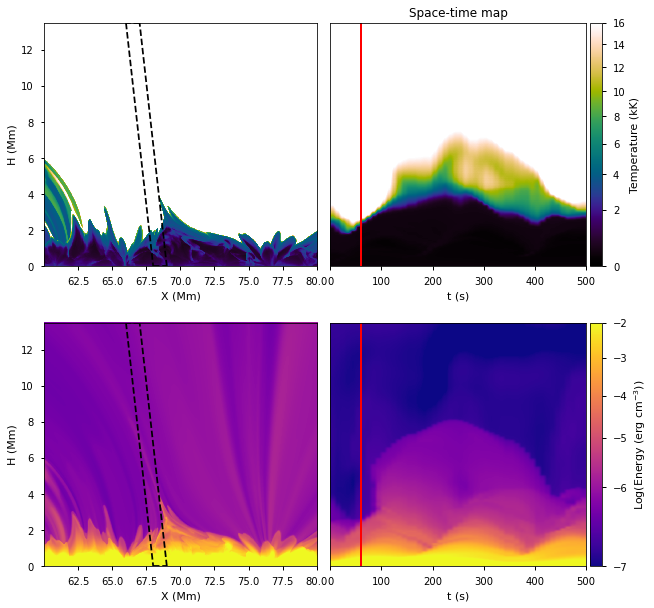

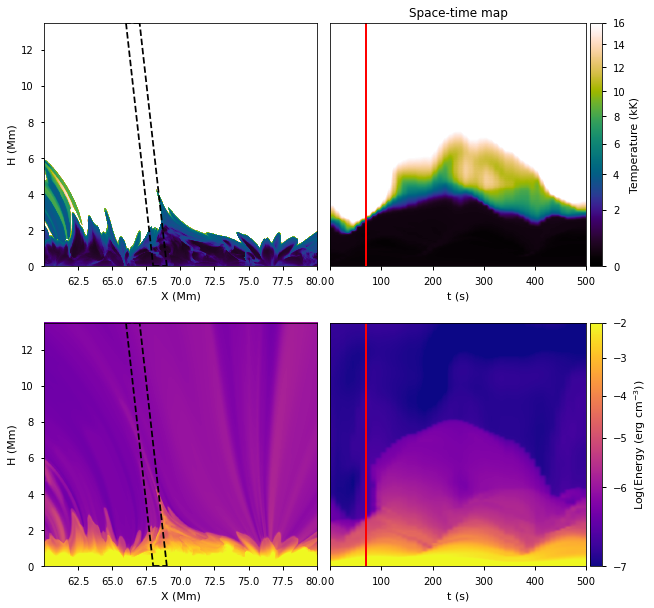

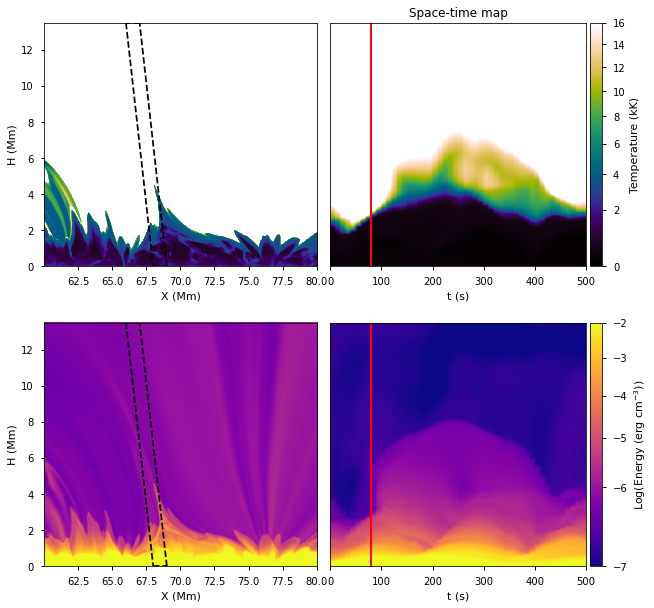

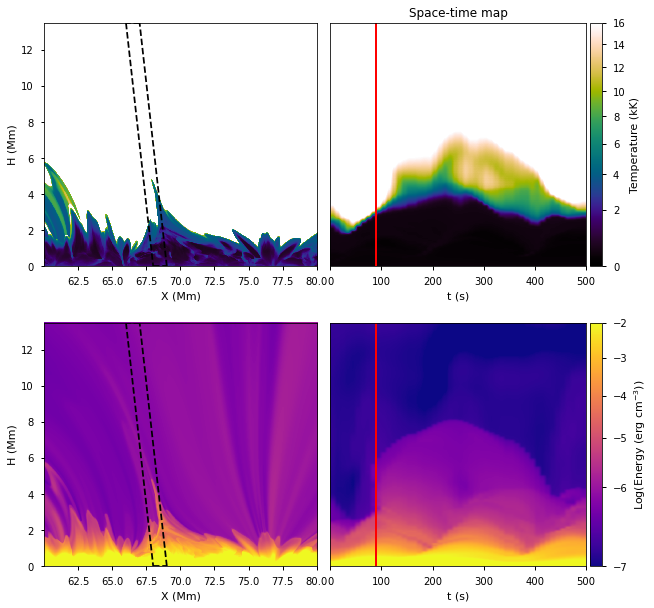

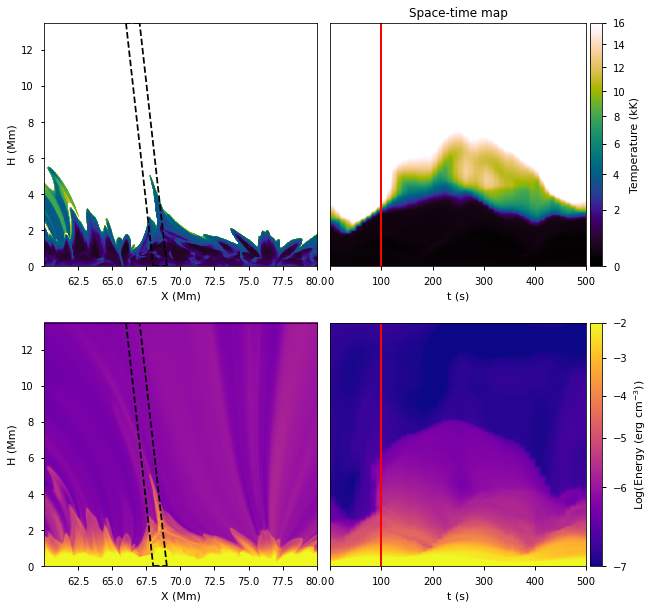

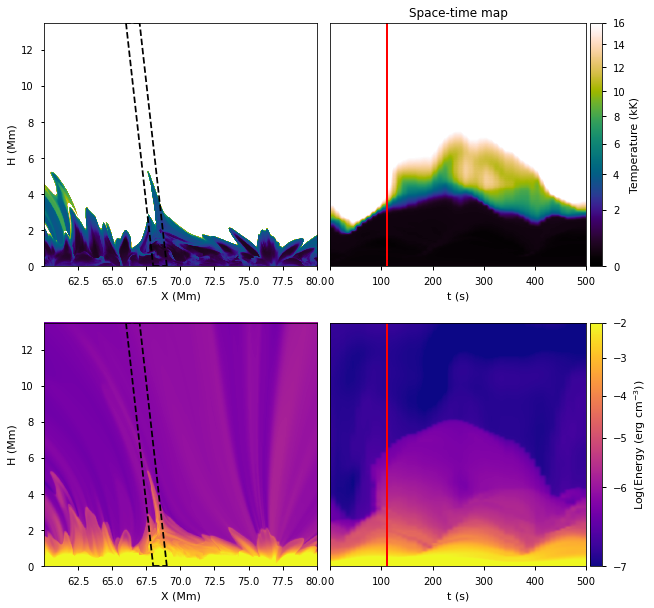

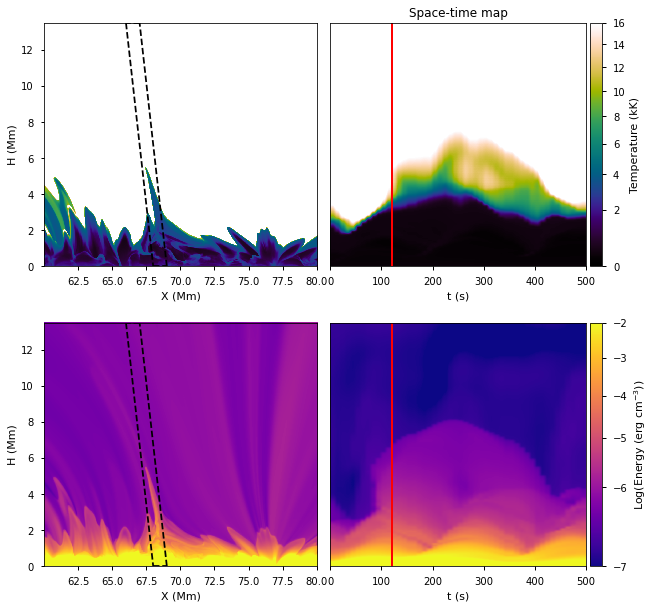

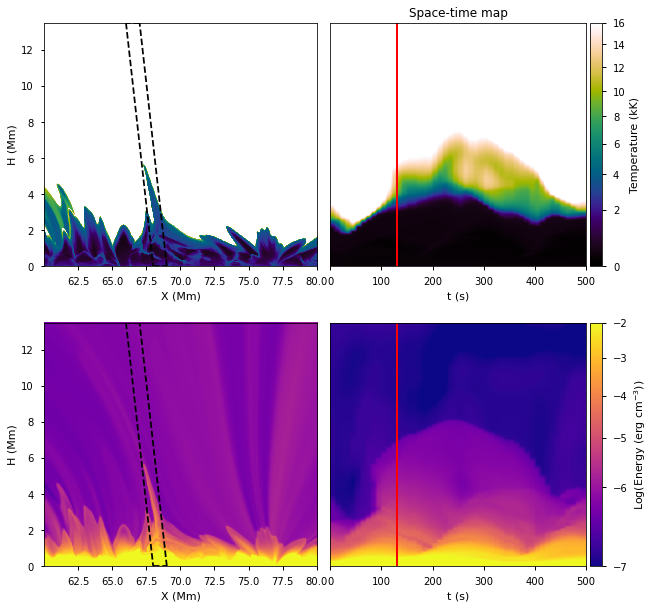

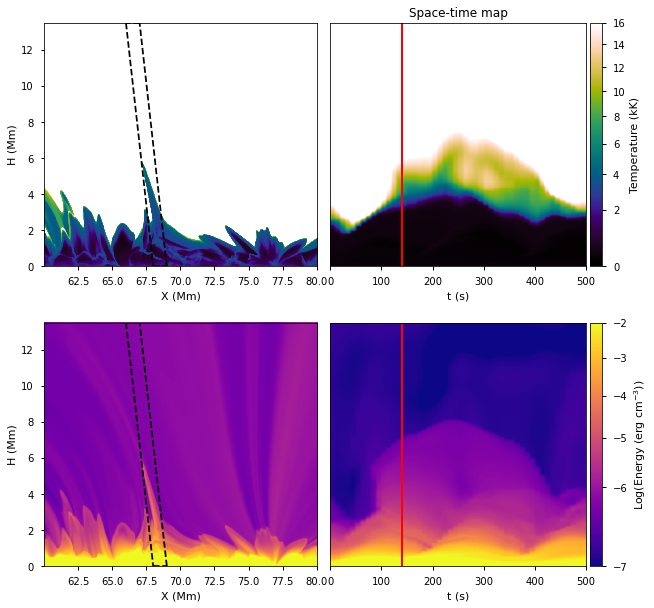

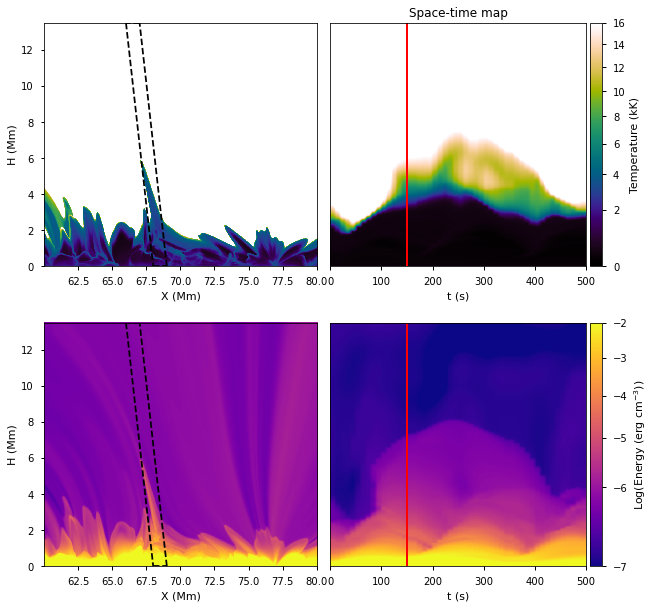

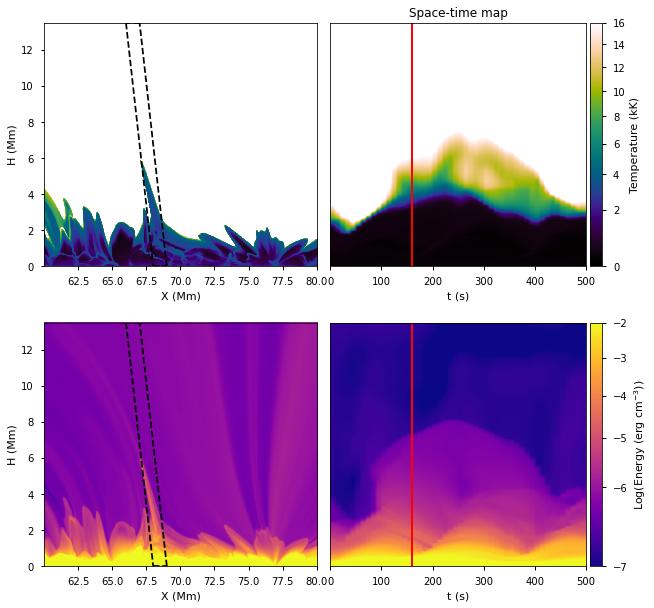

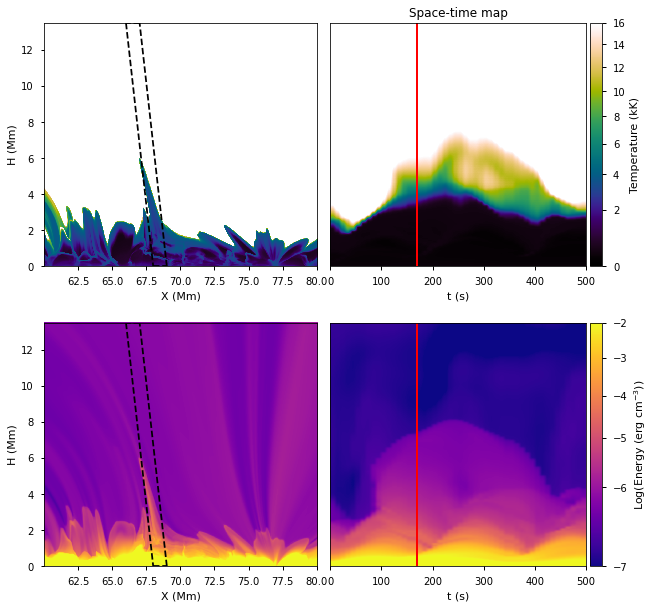

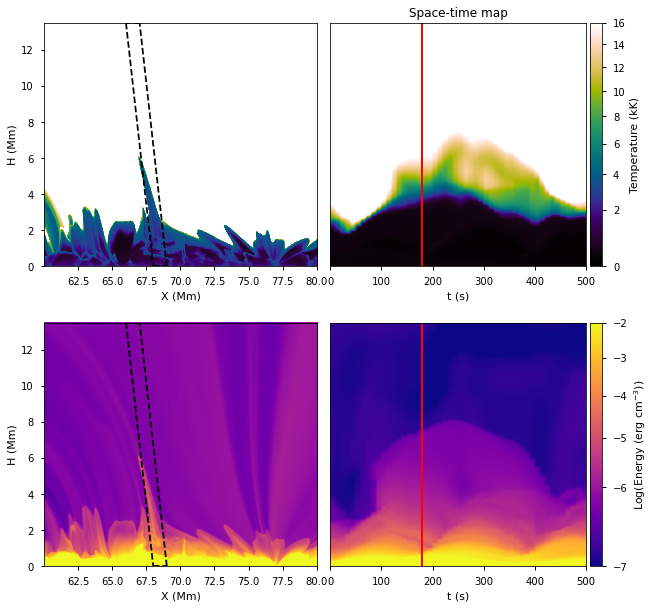

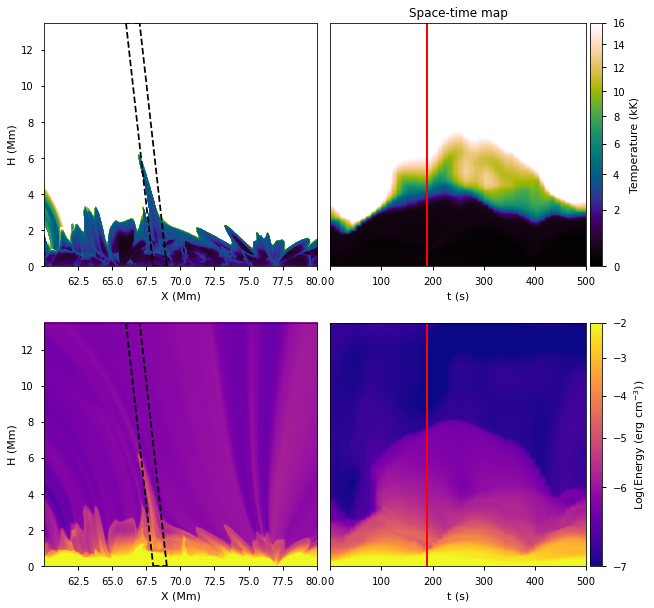

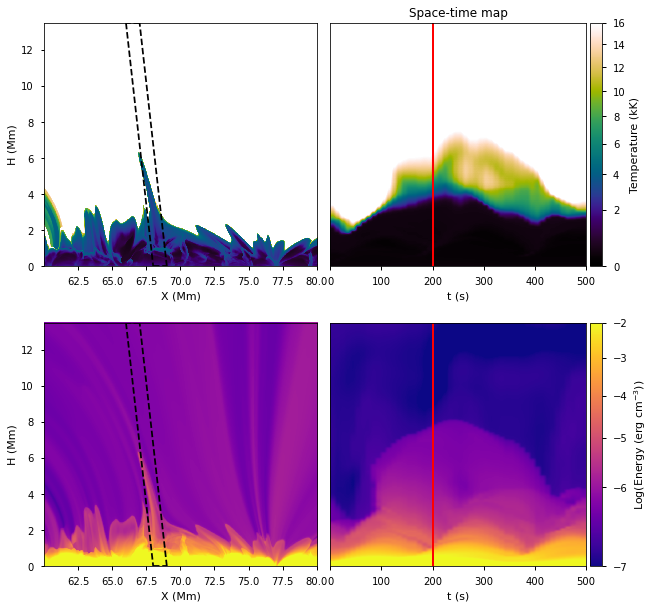

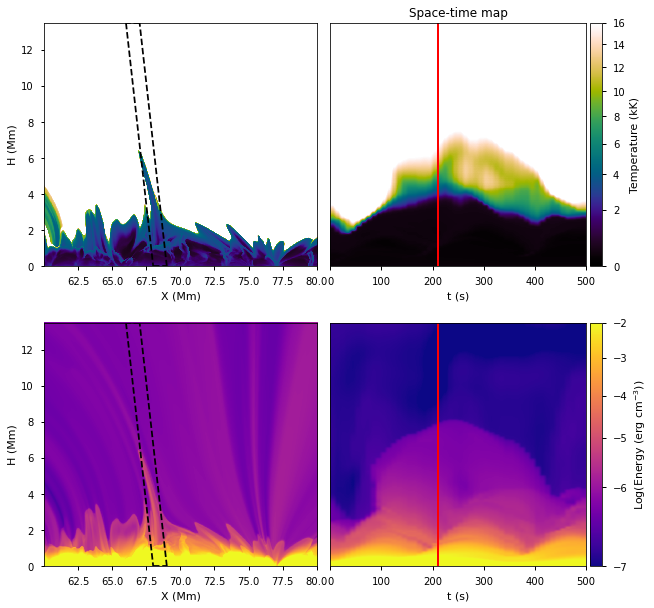

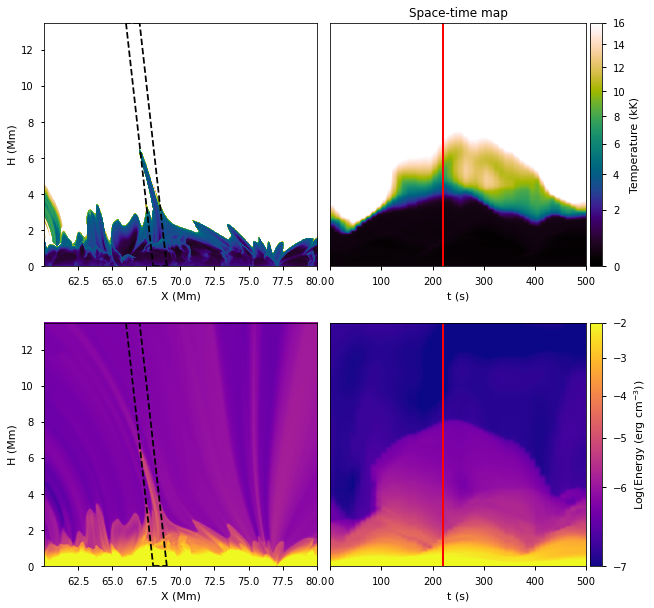

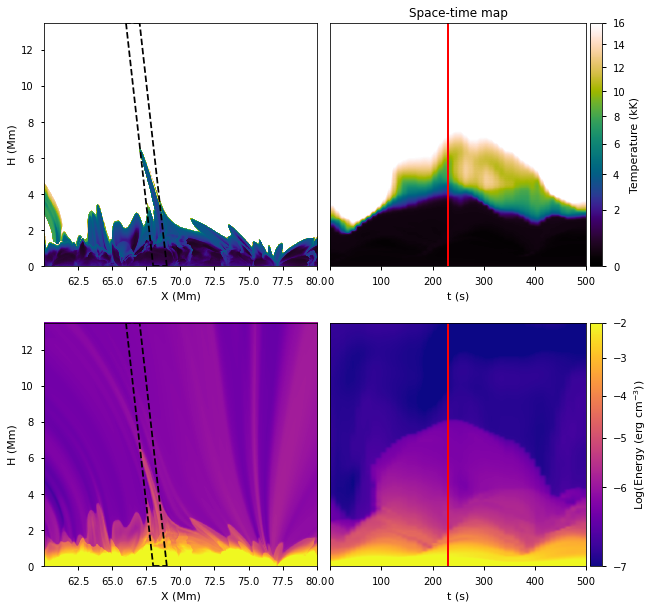

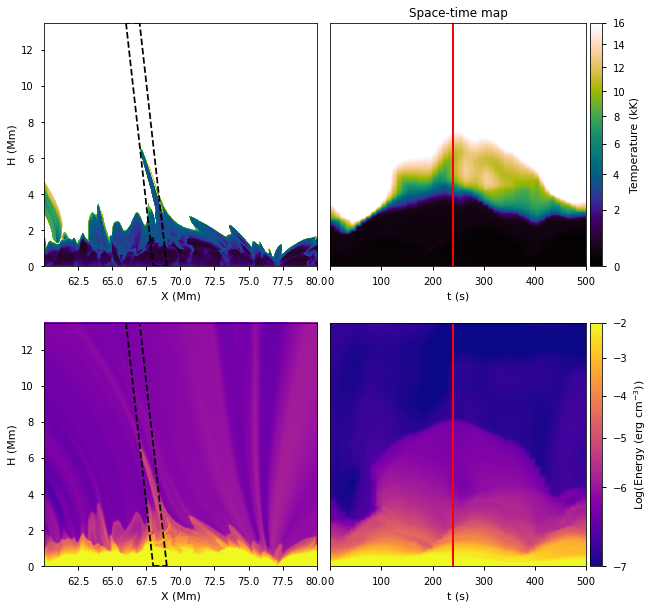

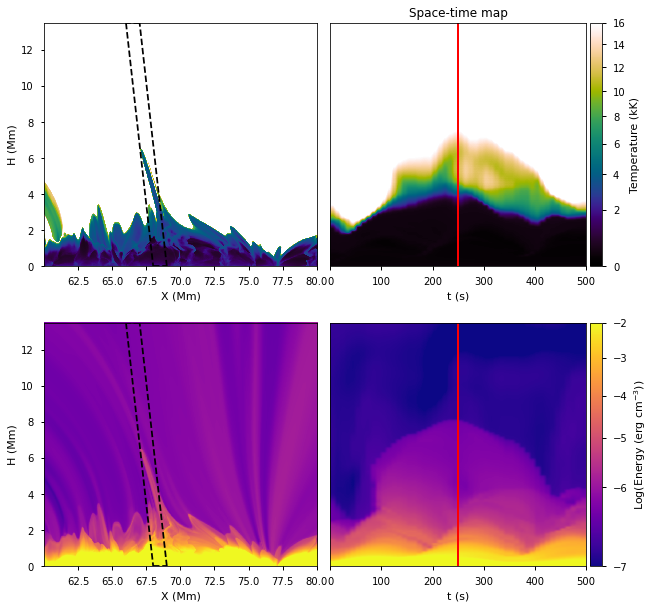

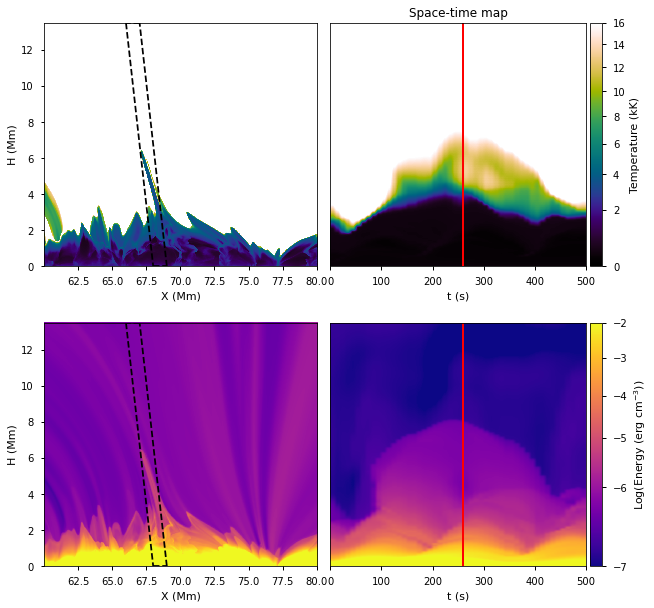

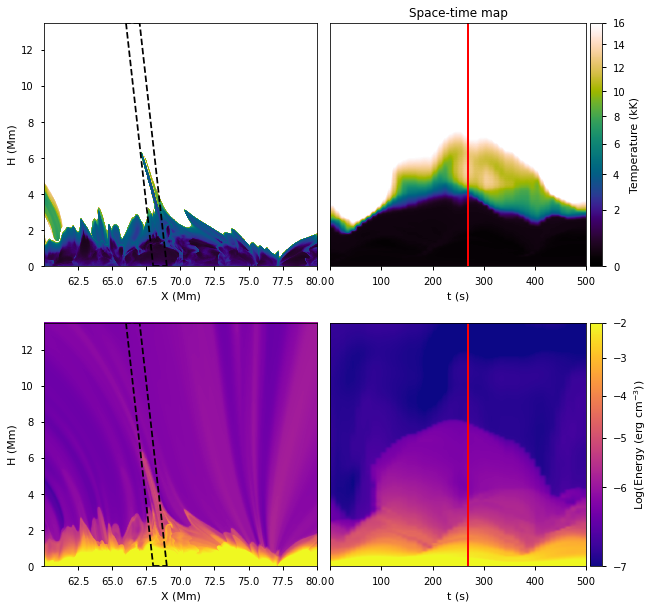

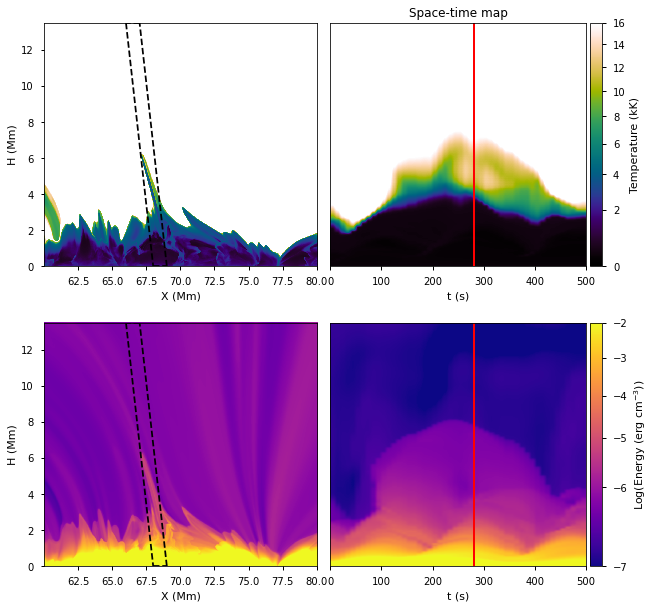

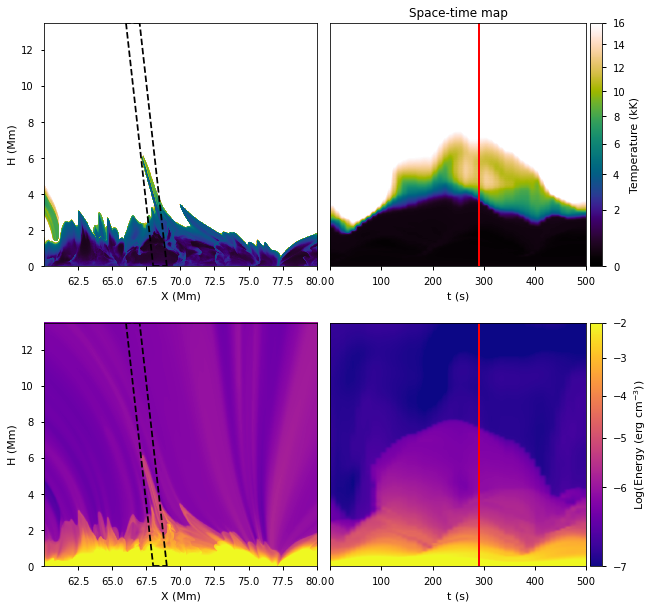

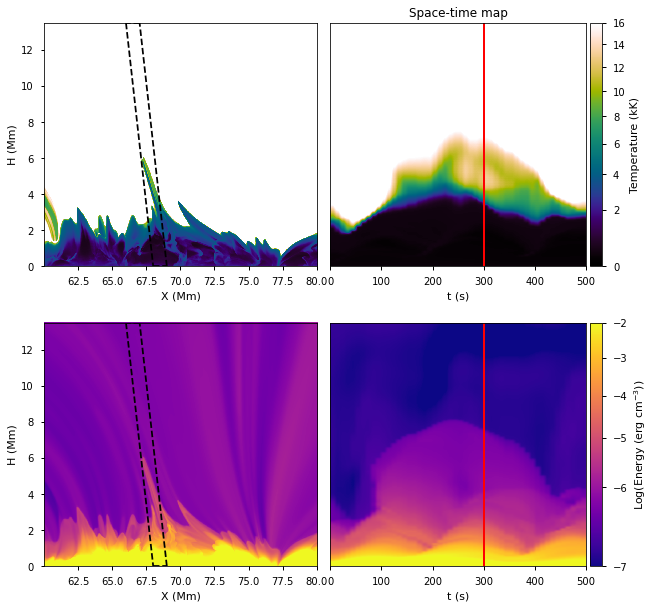

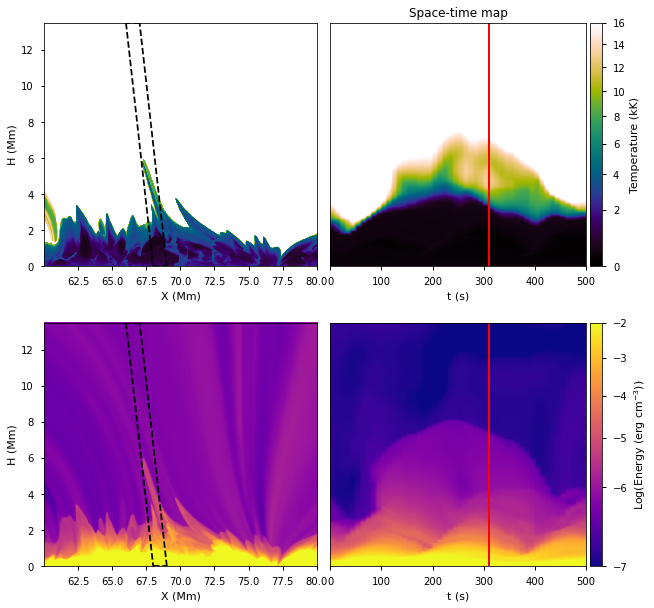

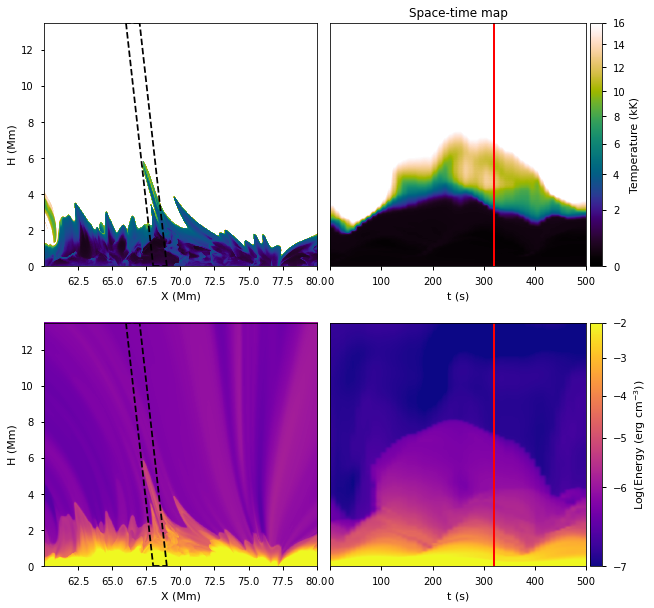

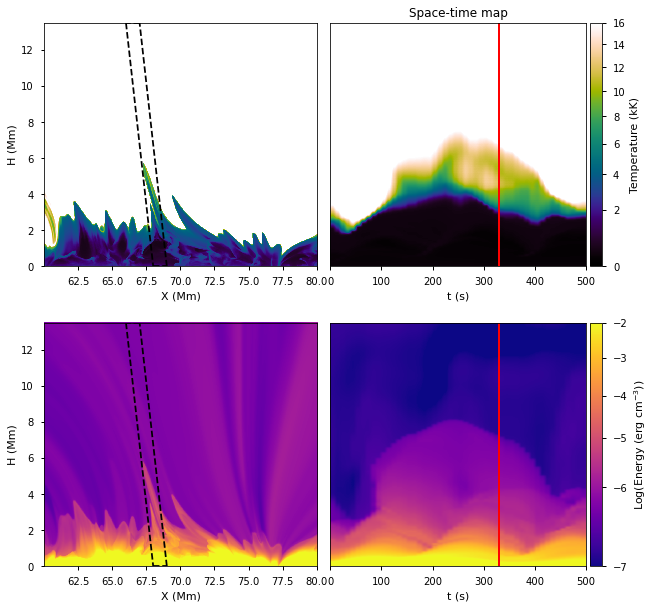

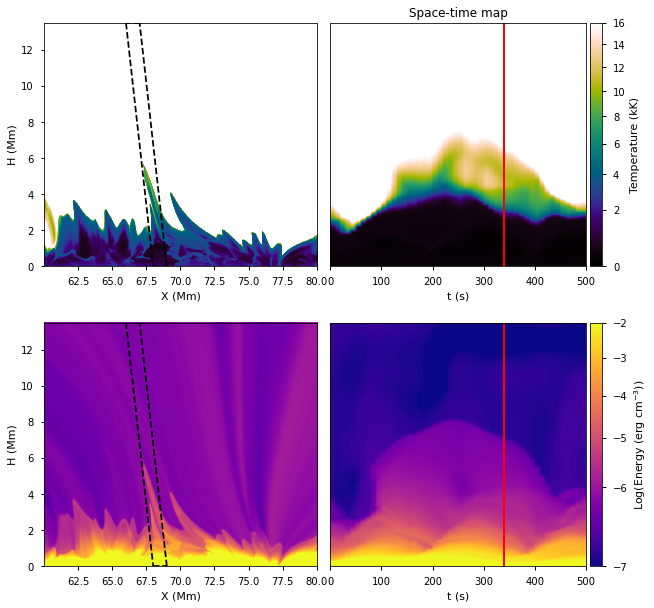

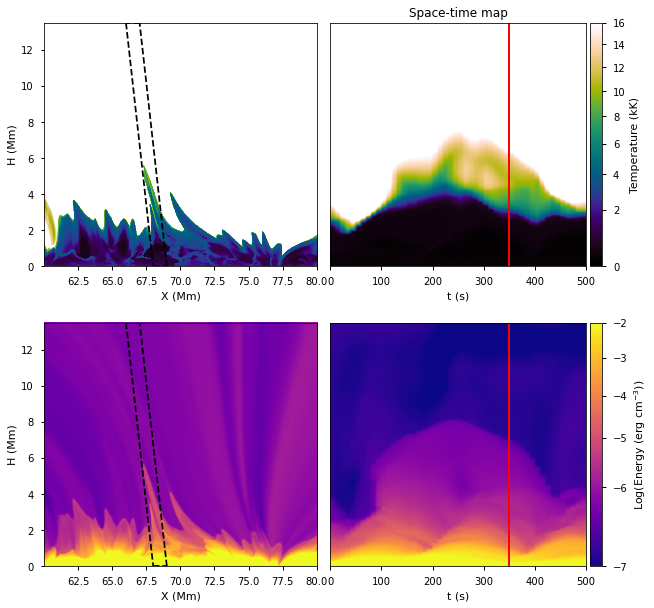

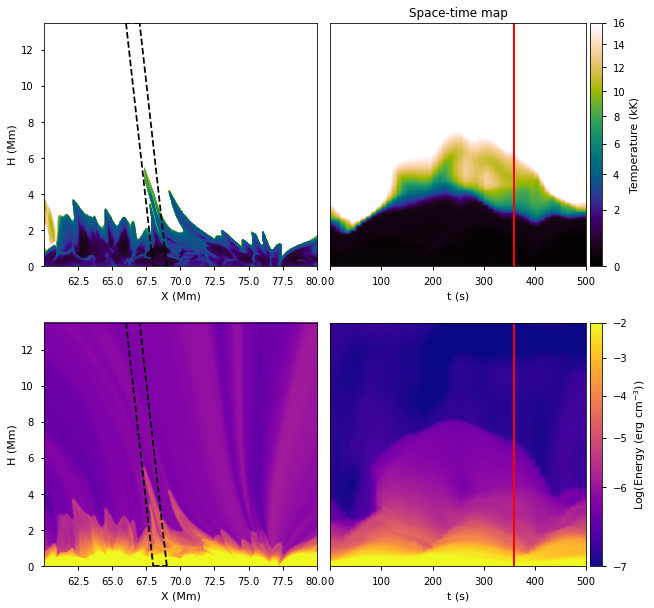

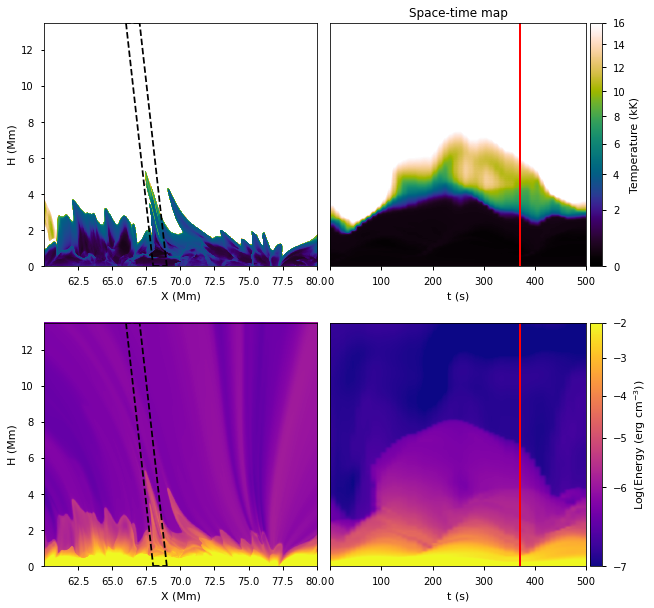

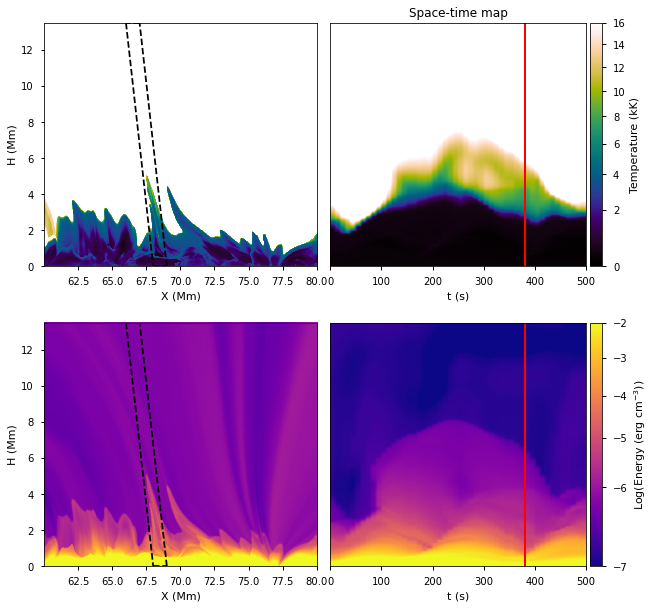

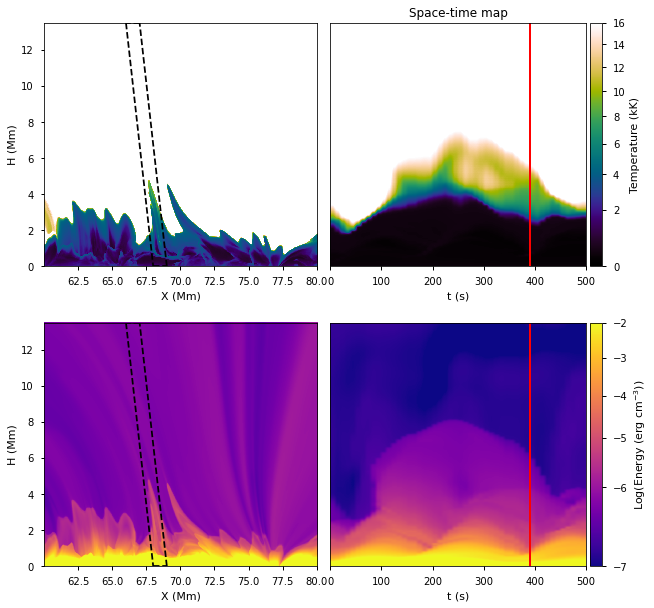

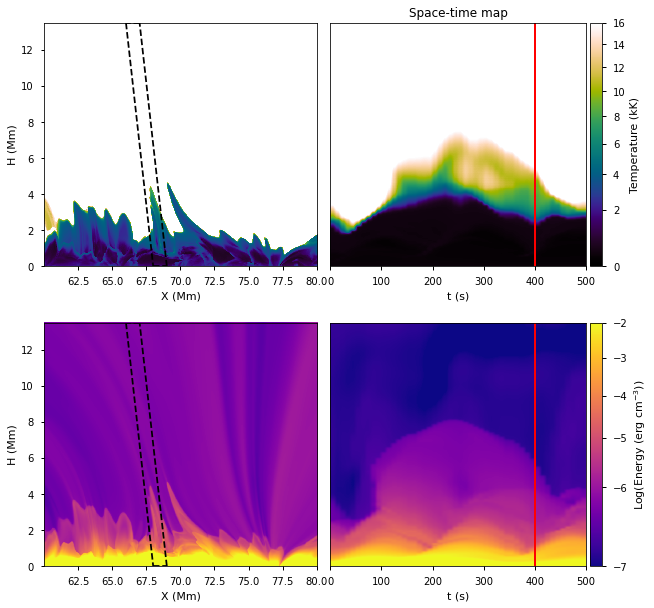

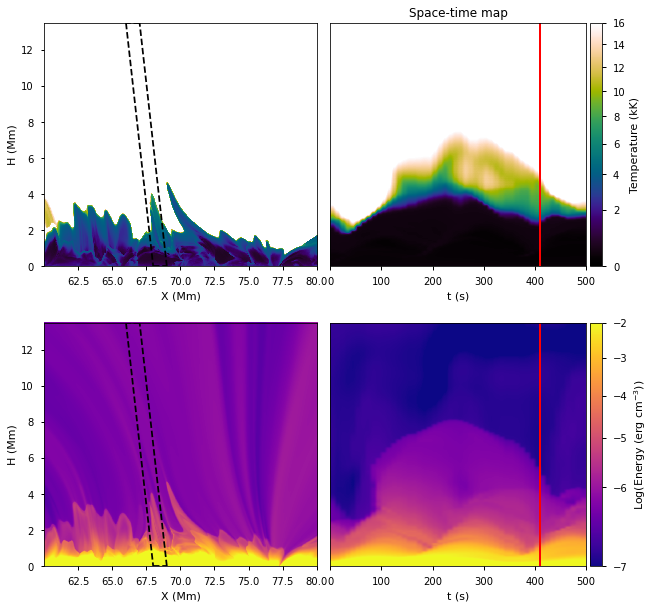

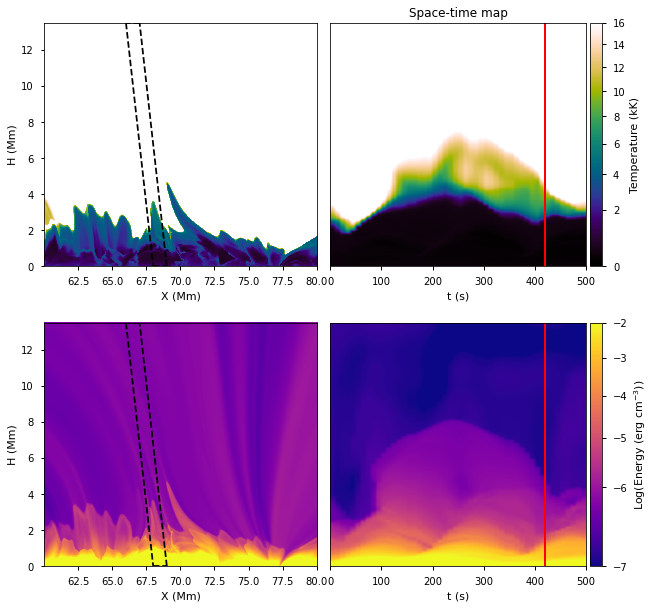

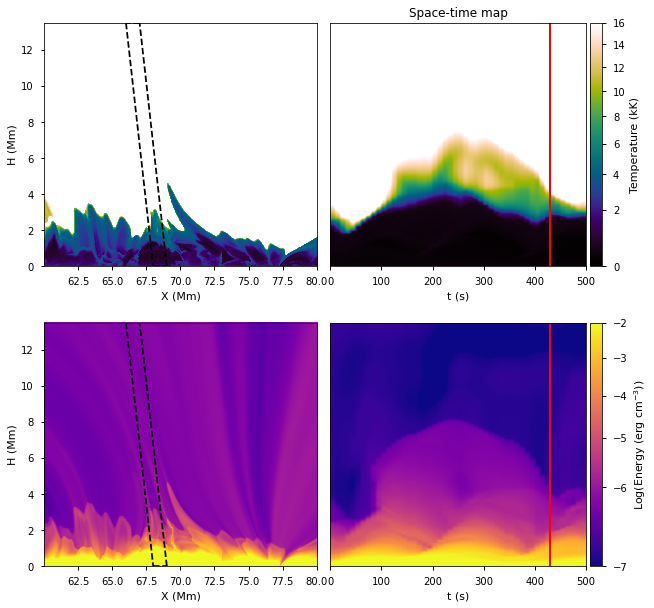

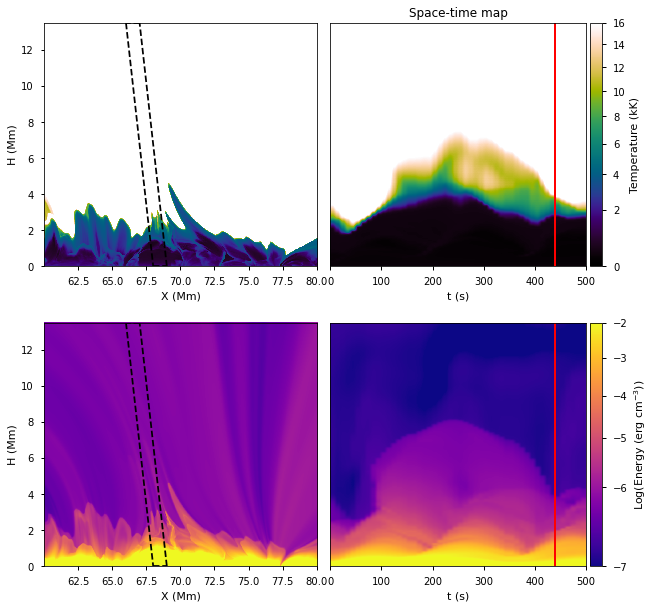

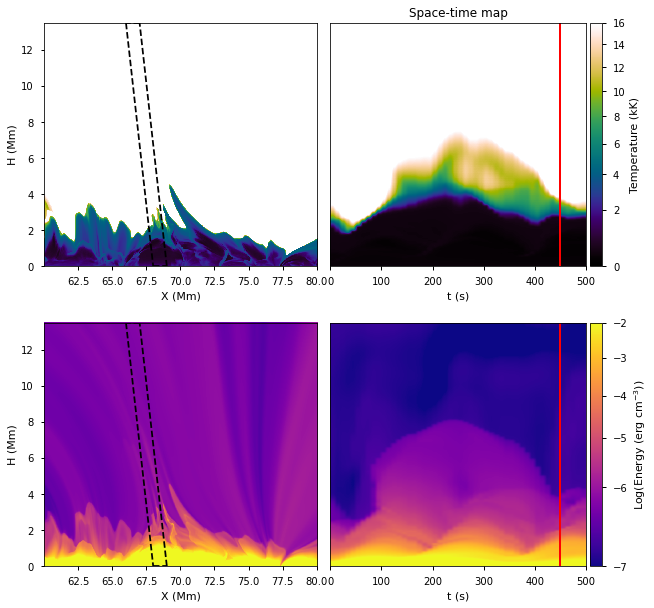

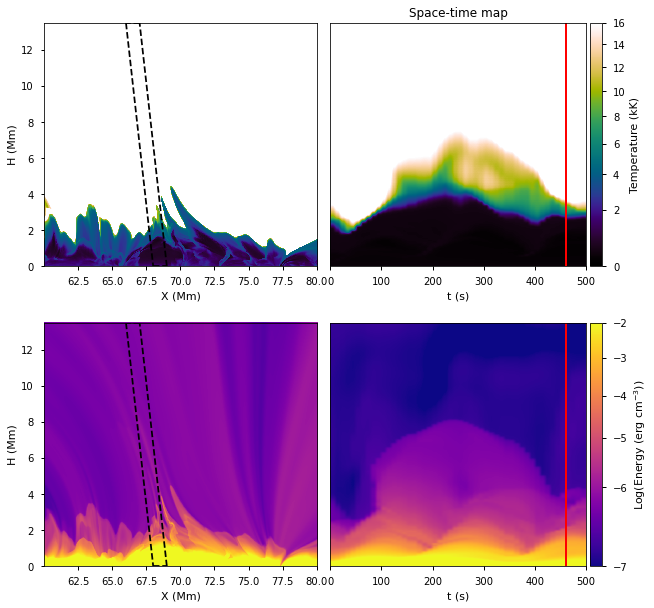

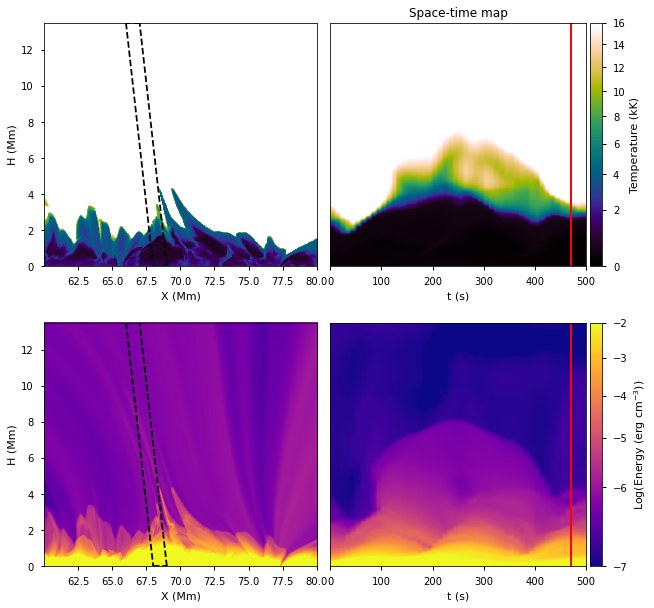

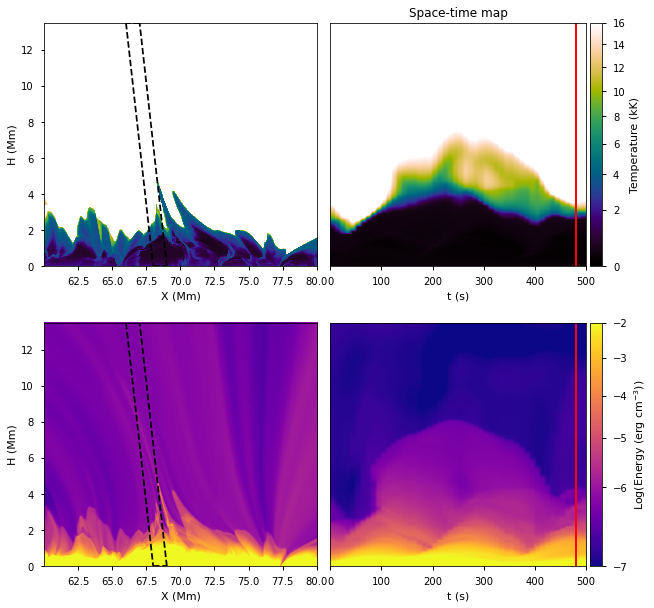

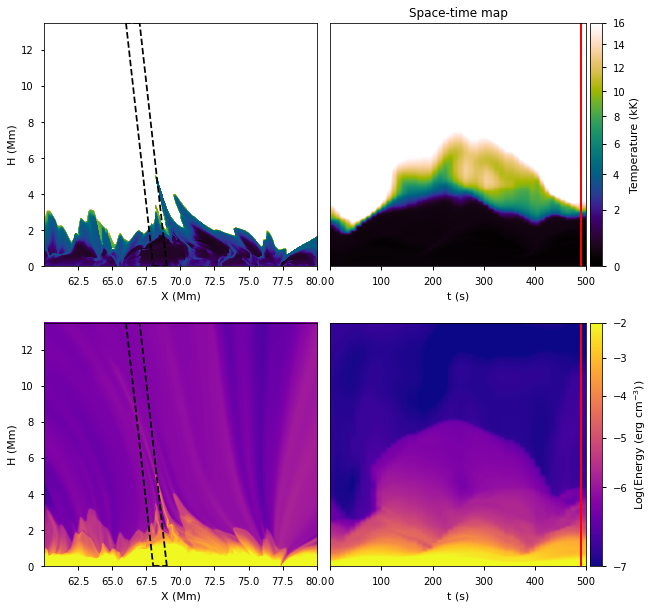

In [595]:
plt.style.use('seaborn-notebook')
for scan in tqdm(range(50)):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    fig.subplots_adjust(hspace = 0.23,wspace=0.05)
    axs=axs.ravel()
    norm1 = cm.colors.Normalize(vmax=1.6e4/1e3, vmin=1)
    im0 = NonUniformImage(axs[0], interpolation=None,cmap=cmr.rainforest,norm=norm1,extent=[x[4320]/1e6,x[5759]/1e6,z1[1410],z1[500]])
    im0.set_data(x[4320:5759]/1e6,z1[1410:500:-1],np.flipud(np.squeeze((temp_juan[0,4320:5759,scan,500:1410]/1e3).T)))
    axs[0].images.append(im0)
    axs[0].set_xlim(x[4320]/1e6, x[5759]/1e6)
    axs[0].set_ylim(0,13.5)
    axs[0].plot(x_values1, y_values1,linestyle='--',color='black')
    axs[0].plot(x_values2, y_values2,linestyle='--',color='black')
    axs[0].plot(x_values3, y_values3,linestyle='--',color='black')
    axs[0].plot(x_values4, y_values4,linestyle='--',color='black')
    axs[0].set_xlabel('X (Mm)')
    axs[0].set_ylabel('H (Mm)')
    # divider = make_axes_locatable(axs[0])
    # cax0 = divider.append_axes("right", size="5%", pad=0.05)
    # plt.colorbar(im0,cax=cax0)

    im1=axs[1].imshow((T_xt_slit[:,:50]/1e3),aspect='auto',cmap=cmr.rainforest,vmax=16,norm=colors.PowerNorm(gamma=0.7),extent=[x2[0],x2[50],z1[1410],z1[500]])
    axs[1].set_yticks([])
    divider = make_axes_locatable(axs[1])
    cax0 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=plt.colorbar(im1,cax=cax0)
    cbar.set_label('Temperature (kK)')
    axs[1].set_xlabel(r't (s)')
    axs[1].set_title('Space-time map')
    axs[1].axvline(x=x2[scan],color='red',linestyle='-',linewidth=2)

    norm2 = cm.colors.Normalize(vmax=-2, vmin=-7)
    im2 = NonUniformImage(axs[2], interpolation=None, extent=[x[4320]/1e6,x[5759]/1e6,z1[1410],z1[500]],cmap='plasma',norm=norm2)
    im2.set_data(x[4320:5759]/1e6,z1[1410:500:-1],np.flipud(np.squeeze(np.log10(e[4320:5759,scan,500:1410].T))))
    axs[2].images.append(im2)
    axs[2].set_xlim(x[4320]/1e6, x[5759]/1e6)
    axs[2].set_ylim(0,13.5)
    axs[2].plot(x_values1, y_values1,linestyle='--',color='black')
    axs[2].plot(x_values2, y_values2,linestyle='--',color='black')
    axs[2].plot(x_values3, y_values3,linestyle='--',color='black')
    axs[2].plot(x_values4, y_values4,linestyle='--',color='black')
    axs[2].set_xlabel('X (Mm)')
    axs[2].set_ylabel('H (Mm)')

    im3=axs[3].imshow(np.log10(E_xt_slit[:,:50]),aspect='auto',cmap ='plasma',norm=colors.PowerNorm(gamma=0.7),vmin=-7,vmax=-2,extent=[x2[0],x2[50],z1[1410],z1[500]])
    axs[3].set_yticks([])
    divider = make_axes_locatable(axs[3])
    cax3 = divider.append_axes("right", size="5%", pad=0.05)
    cbar=plt.colorbar(im3,cax=cax3)
    cbar.set_label(r'Log(Energy (erg cm$^{-3}$))')
    axs[3].set_xlabel(r't (s)')
    #axs[3].set_title('Space-time map')
    axs[3].axvline(x=x2[scan],color='red',linestyle='-',linewidth=2)
    plt.savefig('/mn/stornext/d9/souvikb/High_impact/Juan_simulation/Energy_vs_temp-'+str(scan)+'.png',dpi=300,orientation='landscape',bbox_inches = 'tight',pad_innches=0.1)
    

